In [182]:
import pandas as pd

In [183]:
df=pd.read_csv("time.csv")

In [184]:
df.columns=df.columns.map(lambda x: x.replace("ms","speedup"))
df.columns
df.head()

,Size(n),Seq(speedup),Doacross(speedup),SIMD(speedup),Domain(speedup)
0,10,20,10,1,20
1,16,106,94,12,71
2,20,222,78,18,159
3,25,462,166,32,239
4,32,1024,380,62,460


In [185]:
for y in df.columns :
    if y!="Size(n)" and y!="Seq(speedup)":
       df[y]=df.apply(lambda x: round(x["Seq(speedup)"]/x[y],2),axis=1)

In [186]:
df.drop("Seq(speedup)",axis=1,inplace=True)
df.to_csv("speedup.csv",index=False)
df

,Size(n),Doacross(speedup),SIMD(speedup),Domain(speedup)
0,10,2.00,20.00,1.00
1,16,1.13,8.83,1.49
2,20,2.85,12.33,1.40
3,25,2.78,14.44,1.93
4,32,2.69,16.52,2.23
5,37,2.70,18.29,1.18
6,40,1.67,17.60,1.84
7,45,2.45,19.75,2.00
8,50,2.70,48.03,2.12
9,64,2.78,22.87,2.36


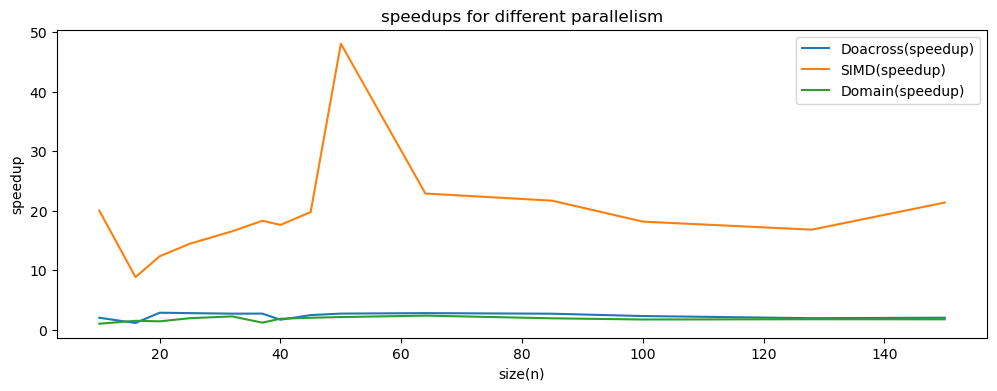

In [187]:
from matplotlib import pyplot as plt

plt.figure(figsize=(12,4))
x="Size(n)"
for y in df.columns :
    if y!="Size(n)" :
        plt.plot(df[x], df[y],label=y)

plt.title("speedups for different parallelism")
plt.xlabel("size(n)")
plt.ylabel("speedup")

plt.legend()
plt.savefig("speedup_graph.jpg")
plt.show()

In [188]:
df=pd.read_csv("time.csv")

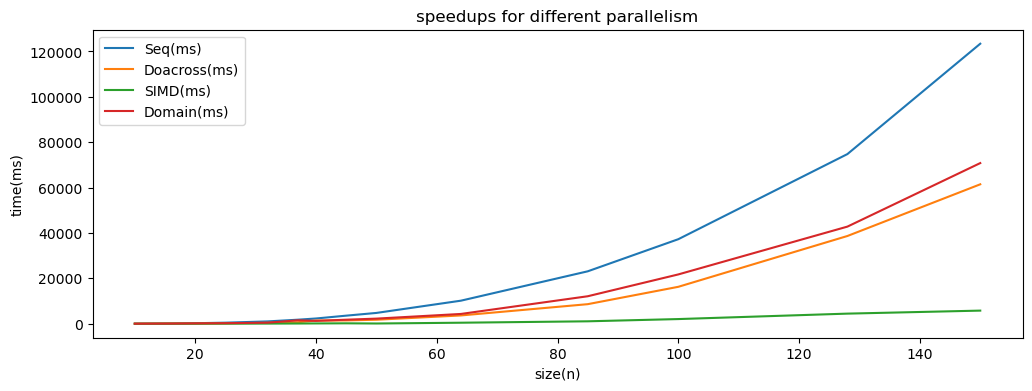

In [189]:
plt.figure(figsize=(12,4))
x="Size(n)"
for y in df.columns :
    if y!="Size(n)" :
        plt.plot(df[x], df[y],label=y)

plt.title("speedups for different parallelism")
plt.xlabel("size(n)")
plt.ylabel("time(ms)")
plt.legend()
plt.savefig("time_graph.jpg")
plt.show()